# Problem 3

In [1]:
from sklearn.datasets import fetch_20newsgroups
ng_train = fetch_20newsgroups(subset='train')
ng_test = fetch_20newsgroups(subset='test')

In [2]:
ng_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [4]:
train_vectors = vectorizer.fit_transform(ng_train.data)

In [5]:
train_vectors.shape

(11314, 130107)

In [6]:
train_vectors

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [7]:
train_y = ng_train.target

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_vectors, train_y, test_size = 0.1, random_state = 1)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1/9, random_state = 1)

### Cosine Similarity, Euclidean Distance, Manhattan Distance
Using 20NG data

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [12]:
ng_train_euc = pairwise_distances(X_train, metric = 'cosine')

In [13]:
ng_val_cos = pairwise_distances(X_train, X_val, metric = 'cosine')

In [14]:
ng_val_euc = pairwise_distances(X_train, X_val, metric = 'euclidean')

In [15]:
ng_val_man = pairwise_distances(X_train, X_val, metric = 'manhattan')

### MNIST Data

In [16]:
from tensorflow.keras.datasets import mnist

In [17]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [18]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


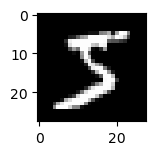

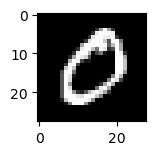

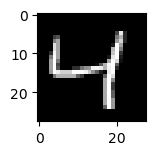

In [19]:
from matplotlib import pyplot

for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

### Editing Distance
Using MNIST Data

In [20]:
import numpy as np

In [21]:
train_X_mod = np.reshape(train_X,(60000, 784))
test_X_mod = np.reshape(test_X,(10000, 784))

In [22]:
train_X_mod = (train_X_mod >= 50).astype(int)
test_X_mod = (test_X_mod >= 50).astype(int)

In [23]:
train_X_mod[train_X_mod == 0] = -1
test_X_mod[test_X_mod == 0] = -1

In [24]:
editing = np.divide(np.subtract(len(train_X_mod.T), np.dot(train_X_mod, test_X_mod.T)),2)

In [25]:
editing.shape


(60000, 10000)

# Problem 4

### Function Declaration

In [26]:
def get_neighbor_index(D, k, train_y):
    #D is an mxn distance matrix, k is number of neighbors, targets is a mx1 array of training targets
    #Gets indices of top k neighbors for each test column in D
    neighbors = []
    for i in range(D[0,:].size):
        neighbors.append(np.argpartition(D[:,i], k)[:k])
    return pd.DataFrame(neighbors)

In [27]:
def get_neighbors(neighbor_indexes, train_y):
    output = pd.DataFrame().reindex_like(neighbor_indexes)
    for col in neighbor_indexes:
        output[col] = neighbor_indexes[col].apply(lambda x: train_y[x])
    return output

In [28]:
import pandas as pd
def get_predictions(neighbors):
    #neighbors is an nxk df of the predicted values for each n test rows
    return list(neighbors.mode(1)[0].astype(int))

In [29]:
def get_comparison(neighbors, test_y):
    compare = pd.DataFrame(columns = ('Predicted', 'Actual'))
    compare['Predicted'] = get_predictions(neighbors)
    compare['Actual'] = test_y
    return compare

In [30]:
def get_mispredictions(comparison):
    return comparison.query('Predicted != Actual')

In [31]:
def analyze_model(D, k, train_y, test_y, show_misses = False):
    indices = get_neighbor_index(D, k, train_y)
    neighbors = get_neighbors(indices, train_y)
    comparison = get_comparison(neighbors, test_y)
    #misses = get_mispredictions(comparison)
    correct = 0

    for index, row in comparison.iterrows():
        if row[0] == row[1]:
            correct += 1
    return (correct/float(len(comparison)))*100


### 20NG Analysis

In [32]:
#ng_val_indices = get_neighbor_index(ng_val_euc, 10, y_train)

In [33]:
#ng_val_neighbors = get_neighbors(ng_val_indices, y_train)

In [34]:
#ng_compare = get_comparison(ng_val_neighbors, y_val)

In [35]:
#ng_misses = get_mispredictions(ng_compare)

In [36]:
train_accuracy_euc = analyze_model(ng_train_euc, 20, y_train, y_train)

In [37]:
train_accuracy_euc

79.35911602209946

Using the Euclidean Distance function and a k of 20 on our training set, we achieve an accuracy score of 72.3%

In [38]:
val_accuracy_euc = analyze_model(ng_val_euc, 20, y_train, y_val)

In [39]:
print(val_accuracy_euc)

72.26148409893993


Using the Euclidean Distance function and a k of 20 on our validation set, we achieve an accuracy score of 72.3%

In [40]:
ng_test_euc = pairwise_distances(X_train, X_test, metric = 'euclidean')

In [41]:
ng_test_euc.shape

(9050, 1132)

In [42]:
test_accuracy = analyze_model(ng_test_euc, 20, y_train, y_test)

In [43]:
test_accuracy

74.20494699646643

Using the same parameters above but on the test data, we achieve an accuracy of 74.2%

### MNIST Analysis

In [44]:
accuracy = analyze_model(editing, 20, train_y, test_y)

In [45]:
accuracy

96.07

Using editing distance and k = 20, we achieve an accuracy of 96% on MNIST data

In [46]:
D = editing
k = 20
indices = get_neighbor_index(D, k, train_y)
neighbors = get_neighbors(indices, train_y)
comparison = get_comparison(neighbors, test_y)
misses = get_mispredictions(comparison)

Index: 43, Predicted: 1, Actual: 2


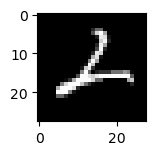

Index: 61, Predicted: 2, Actual: 8


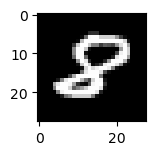

Index: 115, Predicted: 9, Actual: 4


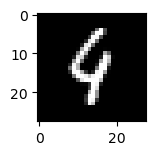

Index: 195, Predicted: 1, Actual: 3


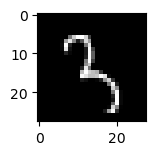

Index: 247, Predicted: 6, Actual: 4


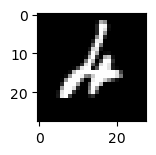

Index: 257, Predicted: 1, Actual: 8


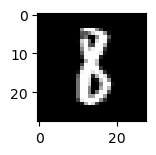

Index: 266, Predicted: 0, Actual: 8


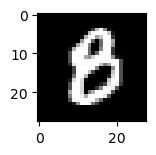

Index: 300, Predicted: 1, Actual: 4


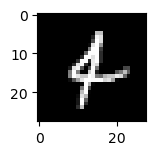

Index: 318, Predicted: 0, Actual: 2


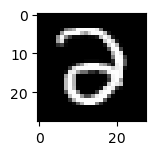

Index: 320, Predicted: 1, Actual: 9


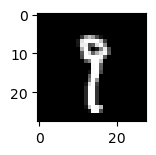

Index: 321, Predicted: 7, Actual: 2


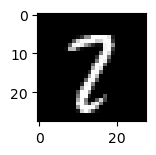

Index: 341, Predicted: 4, Actual: 6


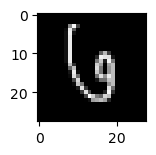

Index: 358, Predicted: 4, Actual: 7


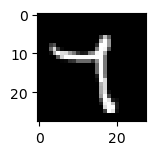

Index: 362, Predicted: 7, Actual: 2


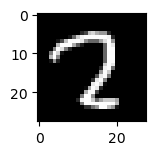

Index: 376, Predicted: 9, Actual: 4


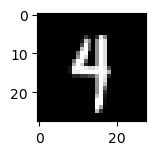

Index: 381, Predicted: 7, Actual: 3


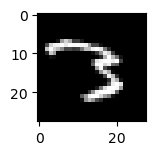

Index: 444, Predicted: 8, Actual: 2


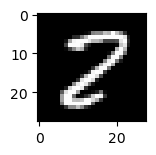

Index: 445, Predicted: 0, Actual: 6


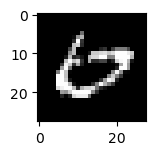

Index: 447, Predicted: 9, Actual: 4


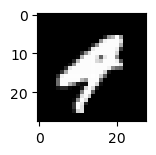

Index: 448, Predicted: 8, Actual: 9


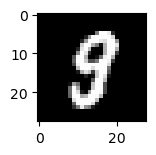

Index: 460, Predicted: 9, Actual: 5


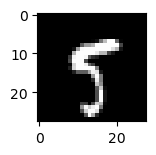

Index: 464, Predicted: 7, Actual: 3


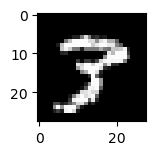

Index: 478, Predicted: 6, Actual: 5


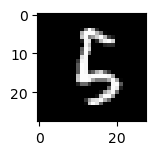

Index: 495, Predicted: 0, Actual: 8


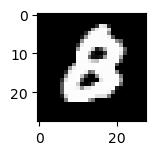

Index: 542, Predicted: 1, Actual: 8


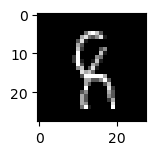

Index: 551, Predicted: 1, Actual: 7


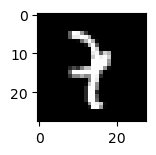

Index: 565, Predicted: 9, Actual: 4


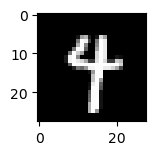

Index: 578, Predicted: 7, Actual: 3


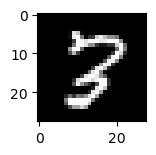

Index: 583, Predicted: 7, Actual: 2


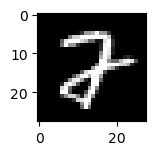

Index: 591, Predicted: 3, Actual: 8


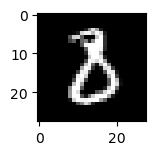

Index: 613, Predicted: 8, Actual: 2


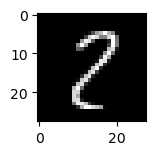

Index: 628, Predicted: 9, Actual: 3


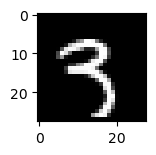

Index: 635, Predicted: 1, Actual: 2


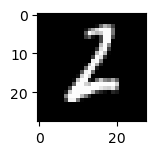

Index: 646, Predicted: 1, Actual: 2


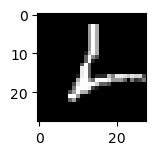

Index: 659, Predicted: 7, Actual: 2


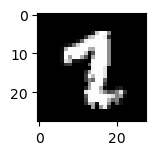

Index: 667, Predicted: 1, Actual: 7


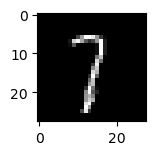

Index: 707, Predicted: 9, Actual: 4


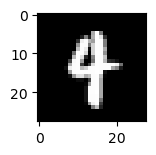

Index: 740, Predicted: 9, Actual: 4


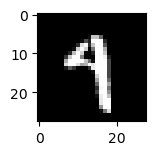

Index: 791, Predicted: 9, Actual: 5


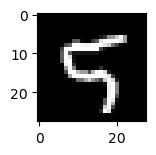

Index: 797, Predicted: 1, Actual: 5


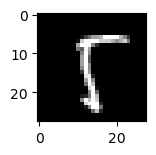

Index: 839, Predicted: 3, Actual: 8


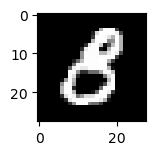

Index: 844, Predicted: 3, Actual: 8


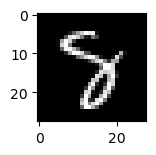

Index: 881, Predicted: 9, Actual: 4


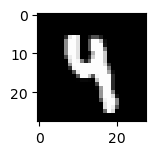

Index: 924, Predicted: 7, Actual: 2


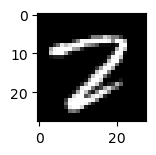

Index: 926, Predicted: 0, Actual: 2


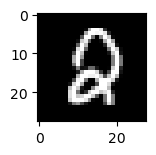

Index: 938, Predicted: 5, Actual: 3


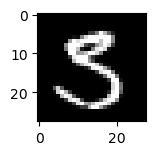

Index: 939, Predicted: 0, Actual: 2


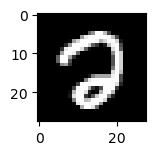

Index: 947, Predicted: 9, Actual: 8


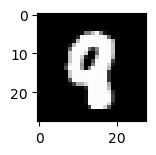

Index: 951, Predicted: 4, Actual: 5


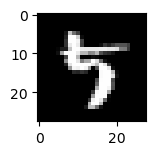

Index: 957, Predicted: 5, Actual: 3


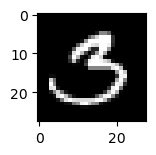

Index: 965, Predicted: 0, Actual: 6


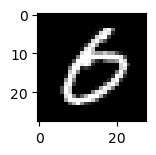

Index: 1003, Predicted: 3, Actual: 5


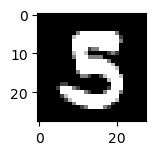

Index: 1014, Predicted: 5, Actual: 6


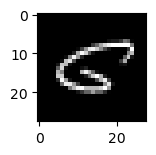

Index: 1039, Predicted: 1, Actual: 7


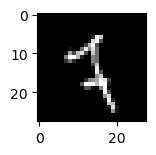

Index: 1062, Predicted: 9, Actual: 3


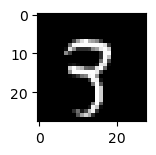

Index: 1068, Predicted: 4, Actual: 8


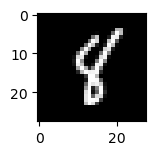

Index: 1107, Predicted: 8, Actual: 9


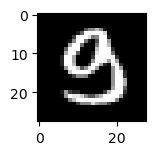

Index: 1112, Predicted: 6, Actual: 4


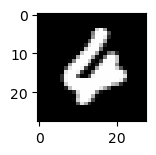

Index: 1114, Predicted: 8, Actual: 3


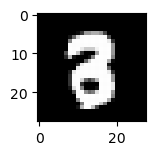

Index: 1173, Predicted: 9, Actual: 7


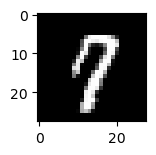

Index: 1181, Predicted: 1, Actual: 6


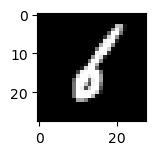

Index: 1184, Predicted: 1, Actual: 2


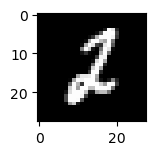

Index: 1192, Predicted: 4, Actual: 9


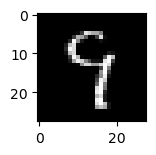

Index: 1226, Predicted: 2, Actual: 7


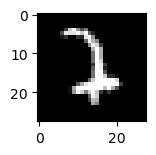

Index: 1242, Predicted: 9, Actual: 4


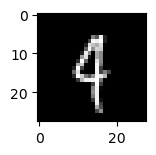

Index: 1247, Predicted: 0, Actual: 9


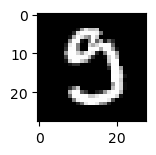

Index: 1260, Predicted: 1, Actual: 7


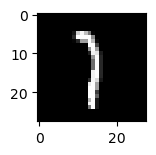

Index: 1270, Predicted: 9, Actual: 4


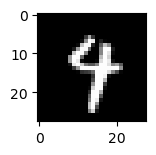

Index: 1283, Predicted: 1, Actual: 7


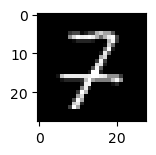

Index: 1299, Predicted: 7, Actual: 5


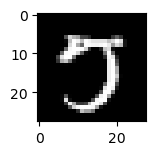

Index: 1319, Predicted: 3, Actual: 8


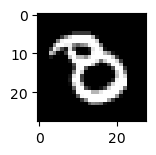

Index: 1326, Predicted: 1, Actual: 7


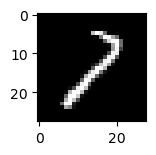

Index: 1356, Predicted: 8, Actual: 2


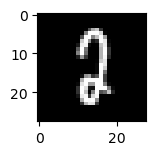

Index: 1364, Predicted: 2, Actual: 8


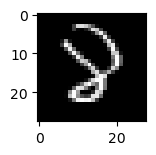

Index: 1378, Predicted: 6, Actual: 5


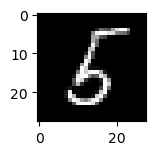

Index: 1393, Predicted: 3, Actual: 5


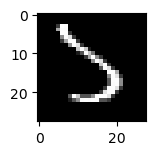

Index: 1425, Predicted: 9, Actual: 8


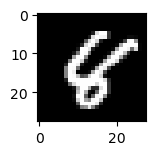

Index: 1433, Predicted: 1, Actual: 8


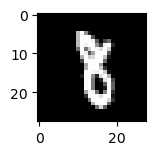

Index: 1465, Predicted: 1, Actual: 4


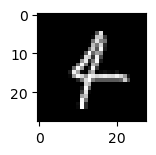

Index: 1496, Predicted: 9, Actual: 7


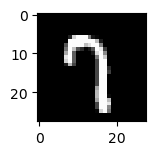

Index: 1500, Predicted: 1, Actual: 7


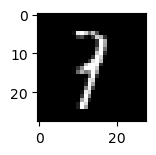

Index: 1522, Predicted: 9, Actual: 7


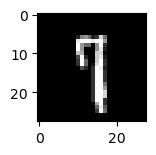

Index: 1530, Predicted: 7, Actual: 8


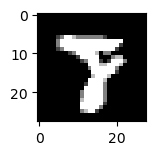

Index: 1549, Predicted: 6, Actual: 4


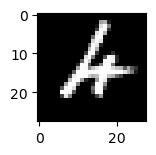

Index: 1553, Predicted: 3, Actual: 9


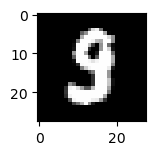

Index: 1559, Predicted: 3, Actual: 9


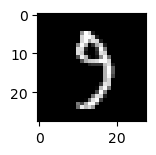

Index: 1571, Predicted: 9, Actual: 4


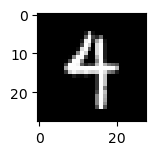

Index: 1634, Predicted: 7, Actual: 4


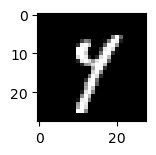

Index: 1681, Predicted: 7, Actual: 3


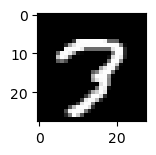

Index: 1709, Predicted: 3, Actual: 9


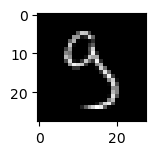

Index: 1716, Predicted: 1, Actual: 7


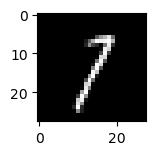

Index: 1717, Predicted: 0, Actual: 8


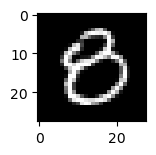

Index: 1718, Predicted: 9, Actual: 7


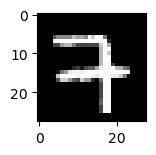

Index: 1721, Predicted: 9, Actual: 7


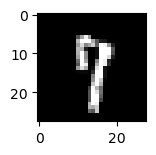

Index: 1737, Predicted: 3, Actual: 5


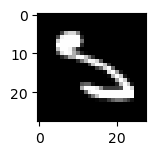

Index: 1754, Predicted: 1, Actual: 7


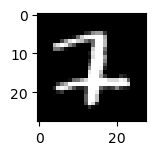

Index: 1782, Predicted: 4, Actual: 8


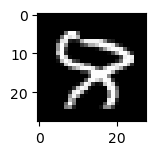

Index: 1790, Predicted: 7, Actual: 2


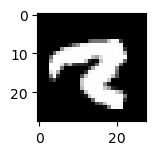

Index: 1813, Predicted: 5, Actual: 8


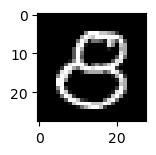

Index: 1823, Predicted: 9, Actual: 8


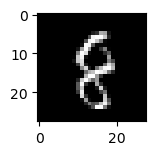

Index: 1850, Predicted: 7, Actual: 8


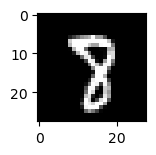

Index: 1865, Predicted: 9, Actual: 4


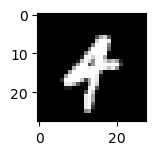

Index: 1878, Predicted: 3, Actual: 8


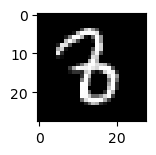

Index: 1901, Predicted: 4, Actual: 9


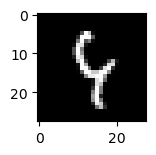

Index: 1968, Predicted: 1, Actual: 8


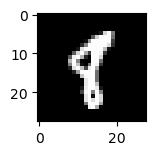

Index: 1970, Predicted: 3, Actual: 5


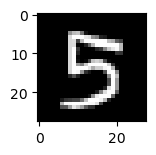

Index: 1984, Predicted: 0, Actual: 2


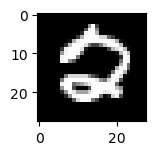

Index: 2004, Predicted: 3, Actual: 8


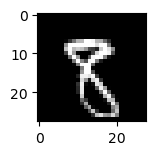

Index: 2044, Predicted: 7, Actual: 2


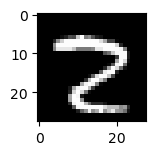

Index: 2052, Predicted: 4, Actual: 8


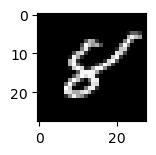

Index: 2053, Predicted: 9, Actual: 4


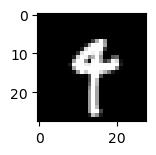

Index: 2063, Predicted: 1, Actual: 7


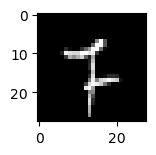

Index: 2070, Predicted: 9, Actual: 7


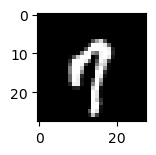

Index: 2093, Predicted: 1, Actual: 8


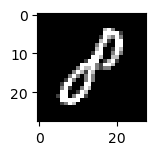

Index: 2098, Predicted: 0, Actual: 2


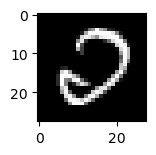

Index: 2109, Predicted: 4, Actual: 3


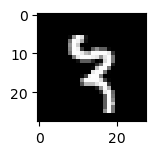

Index: 2118, Predicted: 0, Actual: 6


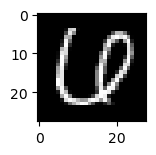

Index: 2121, Predicted: 1, Actual: 8


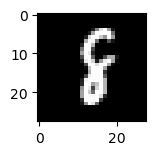

Index: 2130, Predicted: 9, Actual: 4


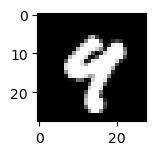

Index: 2135, Predicted: 1, Actual: 6


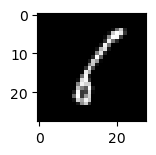

Index: 2182, Predicted: 2, Actual: 1


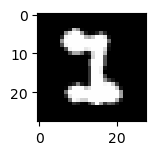

Index: 2186, Predicted: 0, Actual: 2


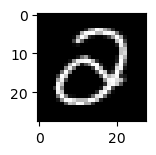

Index: 2189, Predicted: 1, Actual: 9


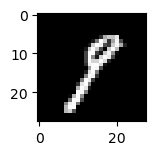

Index: 2197, Predicted: 1, Actual: 4


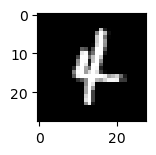

Index: 2224, Predicted: 6, Actual: 5


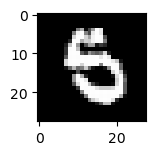

Index: 2237, Predicted: 8, Actual: 5


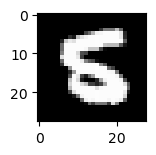

Index: 2272, Predicted: 0, Actual: 8


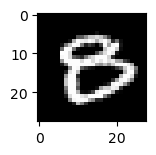

Index: 2293, Predicted: 0, Actual: 9


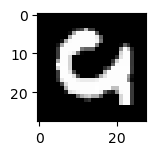

Index: 2299, Predicted: 7, Actual: 2


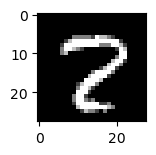

Index: 2325, Predicted: 1, Actual: 7


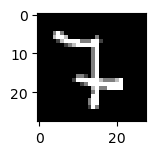

Index: 2339, Predicted: 3, Actual: 5


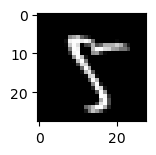

Index: 2387, Predicted: 1, Actual: 9


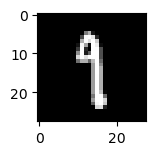

Index: 2393, Predicted: 3, Actual: 8


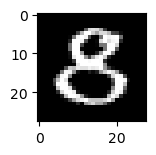

Index: 2395, Predicted: 0, Actual: 8


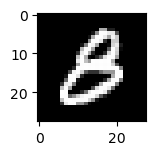

Index: 2406, Predicted: 1, Actual: 9


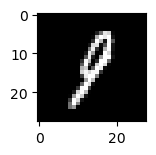

Index: 2437, Predicted: 1, Actual: 2


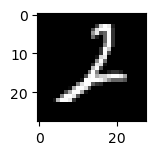

Index: 2447, Predicted: 9, Actual: 4


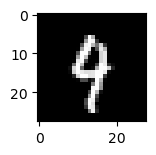

Index: 2454, Predicted: 5, Actual: 6


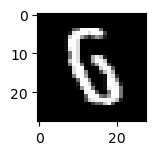

Index: 2462, Predicted: 0, Actual: 2


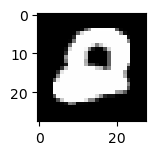

Index: 2488, Predicted: 9, Actual: 2


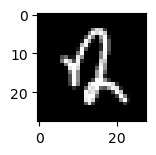

Index: 2533, Predicted: 1, Actual: 3


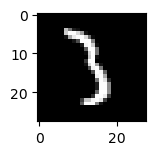

Index: 2534, Predicted: 5, Actual: 3


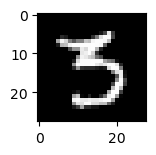

Index: 2573, Predicted: 8, Actual: 5


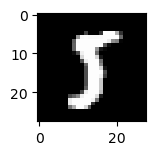

Index: 2597, Predicted: 3, Actual: 5


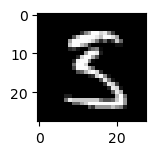

Index: 2607, Predicted: 1, Actual: 7


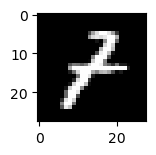

Index: 2648, Predicted: 0, Actual: 9


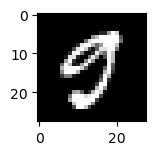

Index: 2654, Predicted: 1, Actual: 6


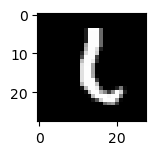

Index: 2730, Predicted: 4, Actual: 7


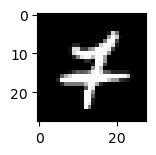

Index: 2758, Predicted: 3, Actual: 8


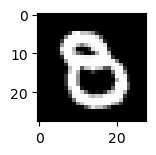

Index: 2770, Predicted: 7, Actual: 3


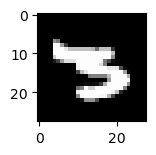

Index: 2771, Predicted: 9, Actual: 4


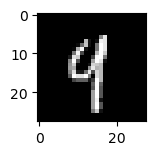

Index: 2780, Predicted: 3, Actual: 2


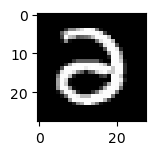

Index: 2896, Predicted: 0, Actual: 8


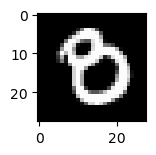

Index: 2927, Predicted: 2, Actual: 3


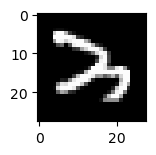

Index: 2930, Predicted: 1, Actual: 5


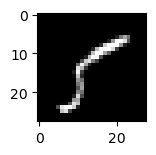

Index: 2939, Predicted: 7, Actual: 9


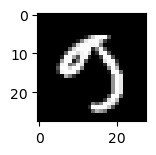

Index: 2945, Predicted: 7, Actual: 3


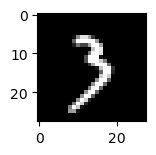

Index: 2953, Predicted: 8, Actual: 3


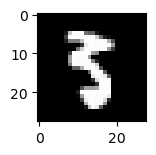

Index: 2995, Predicted: 1, Actual: 6


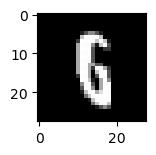

Index: 2998, Predicted: 9, Actual: 4


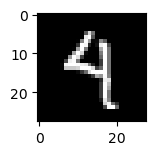

Index: 3005, Predicted: 1, Actual: 9


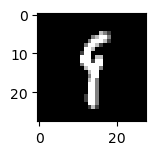

Index: 3060, Predicted: 7, Actual: 9


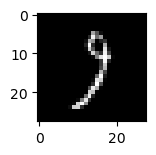

Index: 3062, Predicted: 6, Actual: 8


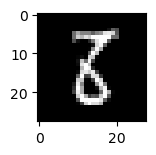

Index: 3073, Predicted: 2, Actual: 1


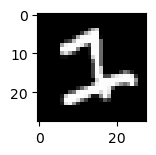

Index: 3117, Predicted: 9, Actual: 5


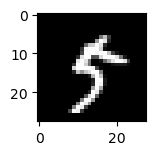

Index: 3136, Predicted: 1, Actual: 7


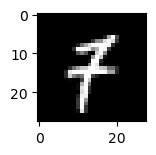

Index: 3160, Predicted: 4, Actual: 9


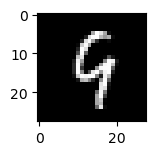

Index: 3176, Predicted: 7, Actual: 2


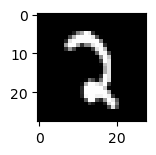

Index: 3206, Predicted: 3, Actual: 8


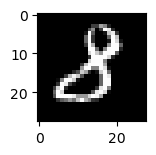

Index: 3207, Predicted: 1, Actual: 2


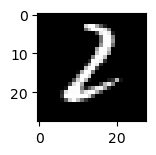

Index: 3225, Predicted: 1, Actual: 7


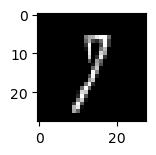

Index: 3240, Predicted: 3, Actual: 9


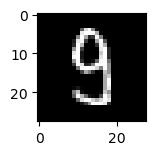

Index: 3250, Predicted: 6, Actual: 2


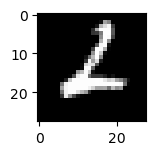

Index: 3262, Predicted: 1, Actual: 7


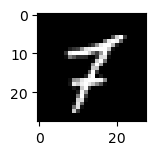

Index: 3269, Predicted: 0, Actual: 6


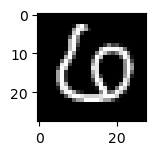

Index: 3333, Predicted: 9, Actual: 7


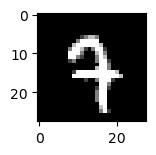

Index: 3336, Predicted: 9, Actual: 5


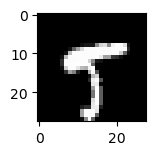

Index: 3369, Predicted: 1, Actual: 9


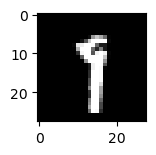

Index: 3376, Predicted: 9, Actual: 7


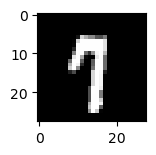

Index: 3384, Predicted: 6, Actual: 2


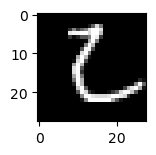

Index: 3405, Predicted: 9, Actual: 4


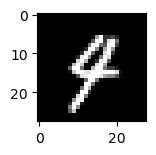

Index: 3448, Predicted: 2, Actual: 3


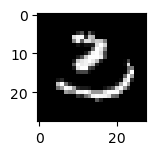

Index: 3475, Predicted: 7, Actual: 3


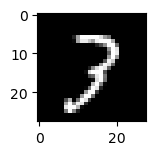

Index: 3490, Predicted: 9, Actual: 4


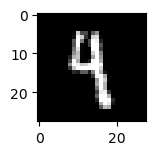

Index: 3503, Predicted: 1, Actual: 9


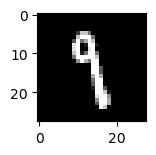

Index: 3506, Predicted: 6, Actual: 5


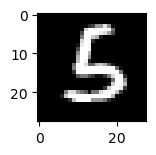

Index: 3511, Predicted: 7, Actual: 2


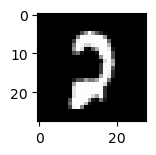

Index: 3520, Predicted: 4, Actual: 6


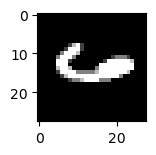

Index: 3558, Predicted: 0, Actual: 5


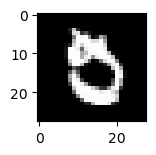

Index: 3559, Predicted: 5, Actual: 8


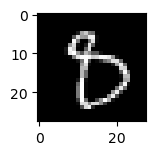

Index: 3597, Predicted: 3, Actual: 9


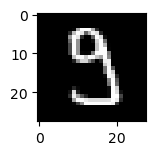

Index: 3599, Predicted: 1, Actual: 2


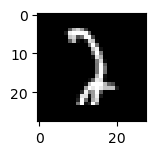

Index: 3629, Predicted: 0, Actual: 8


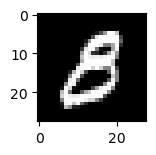

Index: 3662, Predicted: 0, Actual: 8


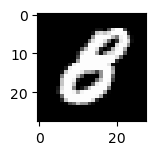

Index: 3686, Predicted: 1, Actual: 3


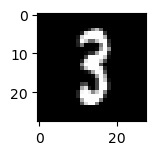

Index: 3702, Predicted: 1, Actual: 5


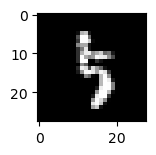

Index: 3726, Predicted: 9, Actual: 4


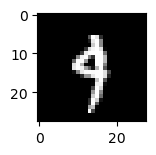

Index: 3742, Predicted: 8, Actual: 3


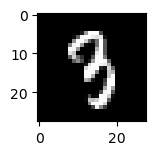

Index: 3751, Predicted: 1, Actual: 7


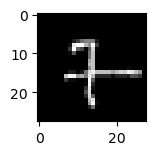

Index: 3757, Predicted: 3, Actual: 8


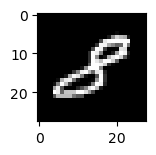

Index: 3767, Predicted: 1, Actual: 7


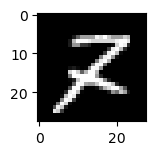

Index: 3769, Predicted: 9, Actual: 3


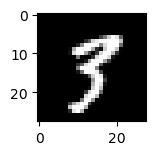

Index: 3778, Predicted: 6, Actual: 5


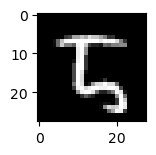

Index: 3780, Predicted: 6, Actual: 4


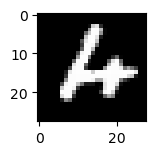

Index: 3796, Predicted: 1, Actual: 2


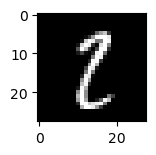

Index: 3808, Predicted: 1, Actual: 7


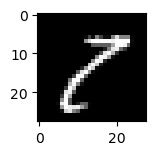

Index: 3811, Predicted: 3, Actual: 2


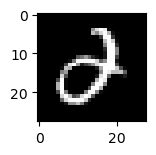

Index: 3821, Predicted: 4, Actual: 9


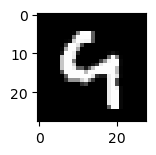

Index: 3838, Predicted: 1, Actual: 7


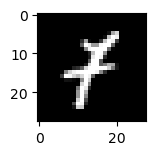

Index: 3853, Predicted: 0, Actual: 6


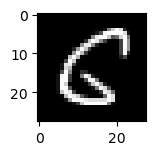

Index: 3902, Predicted: 3, Actual: 5


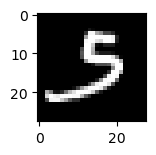

Index: 3906, Predicted: 3, Actual: 1


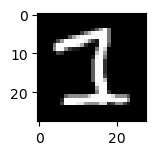

Index: 3926, Predicted: 3, Actual: 9


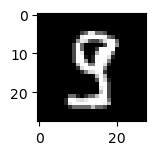

Index: 3941, Predicted: 6, Actual: 4


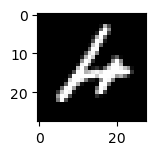

Index: 3946, Predicted: 1, Actual: 2


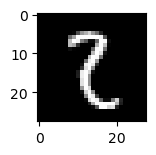

Index: 3976, Predicted: 1, Actual: 7


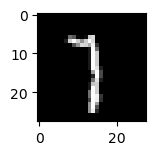

Index: 4000, Predicted: 4, Actual: 9


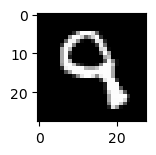

Index: 4007, Predicted: 9, Actual: 7


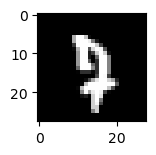

Index: 4017, Predicted: 9, Actual: 4


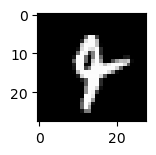

Index: 4056, Predicted: 9, Actual: 5


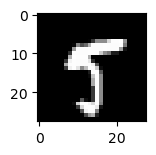

Index: 4065, Predicted: 2, Actual: 0


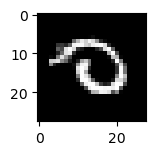

Index: 4075, Predicted: 3, Actual: 8


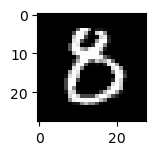

Index: 4078, Predicted: 3, Actual: 9


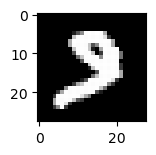

Index: 4116, Predicted: 5, Actual: 8


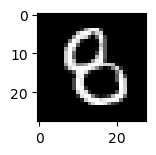

Index: 4152, Predicted: 1, Actual: 5


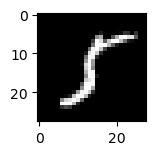

Index: 4163, Predicted: 0, Actual: 9


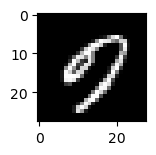

Index: 4176, Predicted: 7, Actual: 2


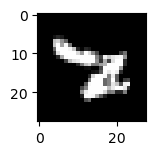

Index: 4194, Predicted: 9, Actual: 4


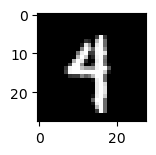

Index: 4199, Predicted: 9, Actual: 7


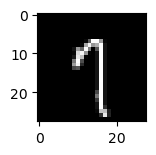

Index: 4205, Predicted: 1, Actual: 2


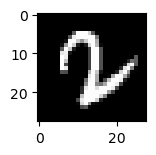

Index: 4224, Predicted: 7, Actual: 9


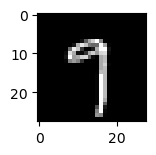

Index: 4248, Predicted: 1, Actual: 2


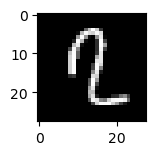

Index: 4265, Predicted: 1, Actual: 4


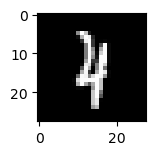

Index: 4289, Predicted: 7, Actual: 2


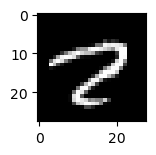

Index: 4294, Predicted: 7, Actual: 9


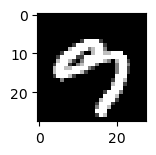

Index: 4297, Predicted: 1, Actual: 7


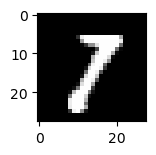

Index: 4306, Predicted: 7, Actual: 3


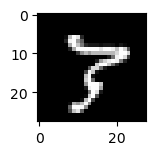

Index: 4341, Predicted: 3, Actual: 2


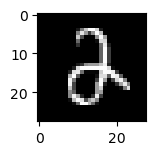

Index: 4344, Predicted: 2, Actual: 9


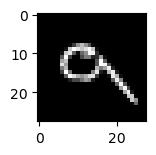

Index: 4356, Predicted: 1, Actual: 5


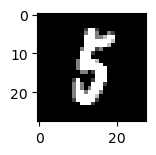

Index: 4360, Predicted: 3, Actual: 5


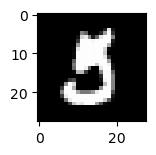

Index: 4374, Predicted: 0, Actual: 5


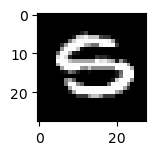

Index: 4382, Predicted: 9, Actual: 4


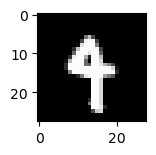

Index: 4384, Predicted: 1, Actual: 2


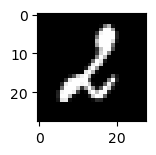

Index: 4433, Predicted: 1, Actual: 7


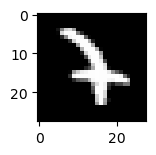

Index: 4435, Predicted: 7, Actual: 3


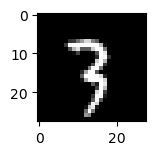

Index: 4438, Predicted: 6, Actual: 4


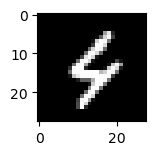

Index: 4451, Predicted: 7, Actual: 2


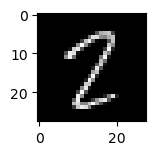

Index: 4497, Predicted: 7, Actual: 8


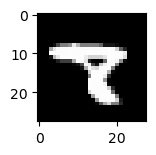

Index: 4500, Predicted: 1, Actual: 9


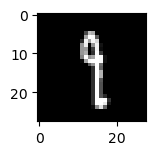

Index: 4504, Predicted: 7, Actual: 2


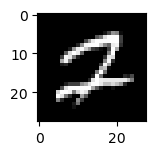

Index: 4575, Predicted: 9, Actual: 4


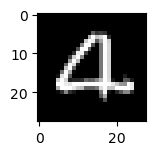

Index: 4578, Predicted: 9, Actual: 7


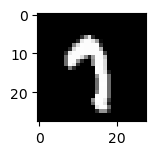

Index: 4601, Predicted: 4, Actual: 8


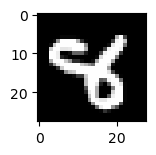

Index: 4639, Predicted: 9, Actual: 8


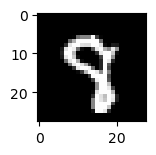

Index: 4671, Predicted: 3, Actual: 8


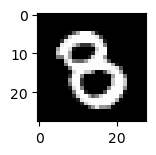

Index: 4690, Predicted: 9, Actual: 7


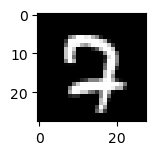

Index: 4699, Predicted: 1, Actual: 6


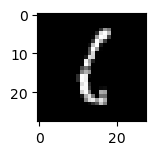

Index: 4712, Predicted: 9, Actual: 5


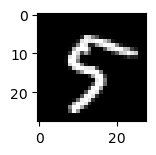

Index: 4755, Predicted: 1, Actual: 3


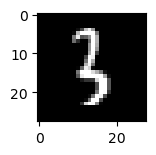

Index: 4761, Predicted: 4, Actual: 9


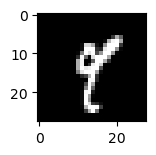

Index: 4785, Predicted: 8, Actual: 3


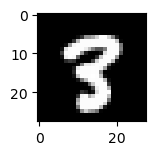

Index: 4807, Predicted: 0, Actual: 8


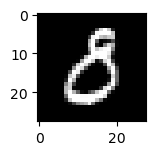

Index: 4823, Predicted: 4, Actual: 9


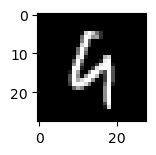

Index: 4837, Predicted: 1, Actual: 7


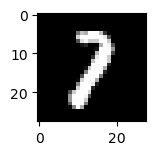

Index: 4860, Predicted: 9, Actual: 4


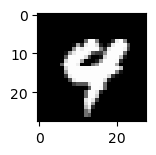

Index: 4879, Predicted: 6, Actual: 8


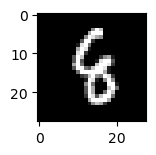

Index: 4886, Predicted: 1, Actual: 7


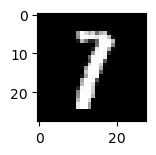

Index: 4890, Predicted: 2, Actual: 8


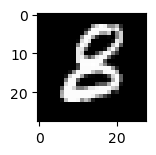

Index: 4943, Predicted: 7, Actual: 2


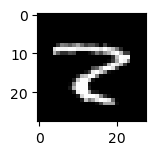

Index: 4950, Predicted: 3, Actual: 2


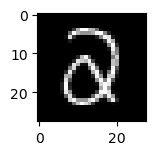

Index: 4956, Predicted: 4, Actual: 8


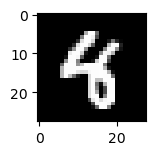

Index: 4966, Predicted: 1, Actual: 7


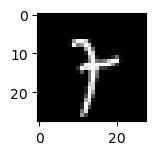

Index: 4978, Predicted: 7, Actual: 8


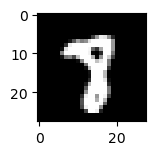

Index: 4990, Predicted: 8, Actual: 3


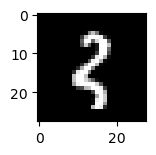

Index: 5001, Predicted: 4, Actual: 9


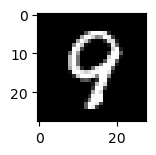

Index: 5068, Predicted: 1, Actual: 4


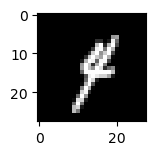

Index: 5159, Predicted: 9, Actual: 4


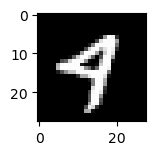

Index: 5176, Predicted: 4, Actual: 8


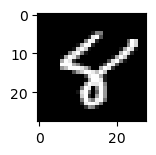

Index: 5278, Predicted: 9, Actual: 8


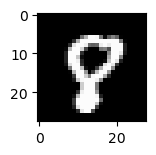

Index: 5288, Predicted: 9, Actual: 8


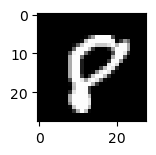

Index: 5331, Predicted: 6, Actual: 1


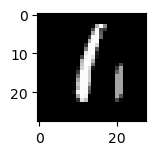

Index: 5360, Predicted: 9, Actual: 8


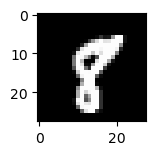

Index: 5586, Predicted: 0, Actual: 8


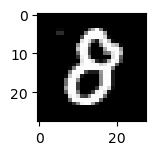

Index: 5600, Predicted: 9, Actual: 7


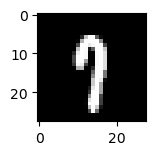

Index: 5617, Predicted: 1, Actual: 4


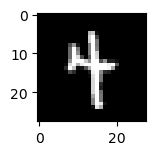

Index: 5634, Predicted: 3, Actual: 2


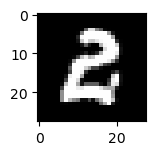

Index: 5649, Predicted: 9, Actual: 7


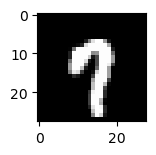

Index: 5677, Predicted: 1, Actual: 4


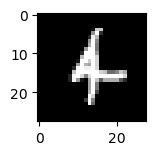

Index: 5678, Predicted: 6, Actual: 8


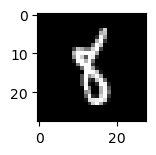

Index: 5691, Predicted: 1, Actual: 4


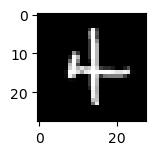

Index: 5698, Predicted: 1, Actual: 4


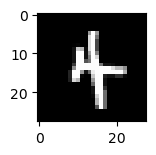

Index: 5714, Predicted: 9, Actual: 7


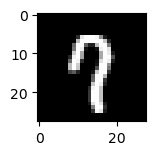

Index: 5720, Predicted: 1, Actual: 4


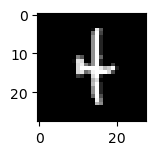

Index: 5734, Predicted: 7, Actual: 3


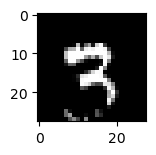

Index: 5735, Predicted: 1, Actual: 5


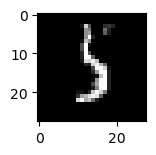

Index: 5835, Predicted: 9, Actual: 7


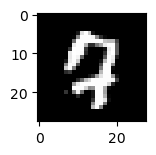

Index: 5841, Predicted: 6, Actual: 3


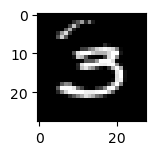

Index: 5866, Predicted: 9, Actual: 7


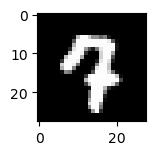

Index: 5887, Predicted: 9, Actual: 7


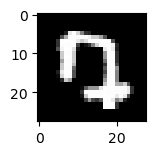

Index: 5888, Predicted: 6, Actual: 4


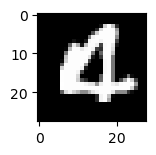

Index: 5906, Predicted: 9, Actual: 7


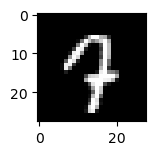

Index: 5936, Predicted: 9, Actual: 4


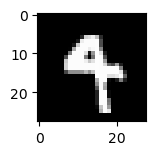

Index: 5937, Predicted: 3, Actual: 5


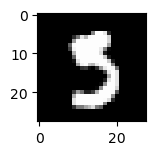

Index: 5955, Predicted: 8, Actual: 3


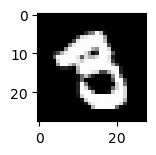

Index: 5973, Predicted: 8, Actual: 3


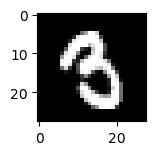

Index: 5982, Predicted: 3, Actual: 5


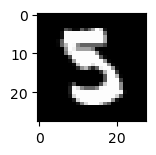

Index: 5997, Predicted: 3, Actual: 5


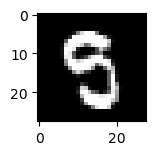

Index: 6011, Predicted: 5, Actual: 3


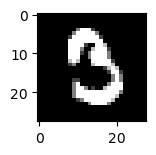

Index: 6035, Predicted: 0, Actual: 2


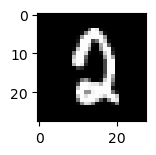

Index: 6059, Predicted: 5, Actual: 3


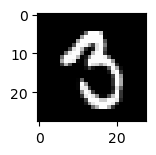

Index: 6065, Predicted: 8, Actual: 3


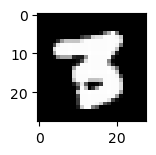

Index: 6071, Predicted: 3, Actual: 9


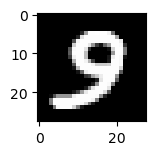

Index: 6081, Predicted: 3, Actual: 9


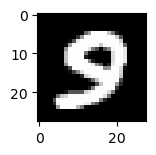

Index: 6091, Predicted: 3, Actual: 9


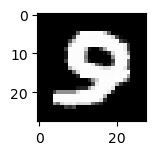

Index: 6157, Predicted: 0, Actual: 9


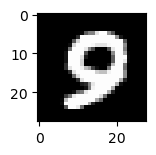

Index: 6166, Predicted: 3, Actual: 9


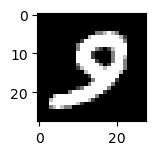

Index: 6172, Predicted: 0, Actual: 9


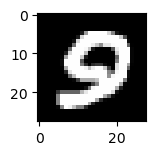

Index: 6173, Predicted: 0, Actual: 9


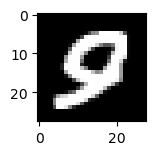

Index: 6417, Predicted: 1, Actual: 4


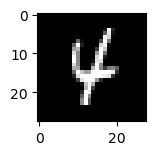

Index: 6505, Predicted: 0, Actual: 9


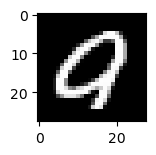

Index: 6555, Predicted: 7, Actual: 8


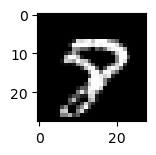

Index: 6560, Predicted: 4, Actual: 9


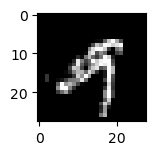

Index: 6571, Predicted: 7, Actual: 9


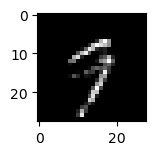

Index: 6576, Predicted: 1, Actual: 7


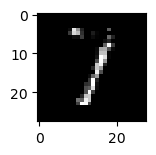

Index: 6597, Predicted: 7, Actual: 0


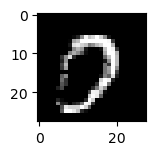

Index: 6598, Predicted: 6, Actual: 5


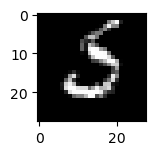

Index: 6625, Predicted: 1, Actual: 8


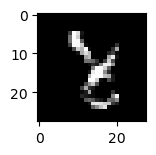

Index: 6651, Predicted: 5, Actual: 0


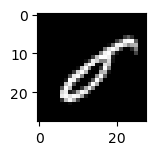

Index: 6700, Predicted: 1, Actual: 4


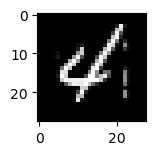

Index: 6755, Predicted: 7, Actual: 8


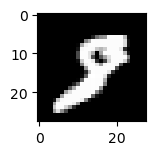

Index: 6906, Predicted: 6, Actual: 2


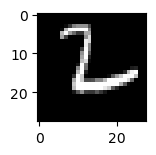

Index: 6945, Predicted: 9, Actual: 8


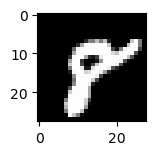

Index: 7094, Predicted: 9, Actual: 8


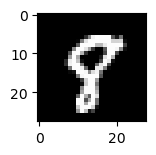

Index: 7121, Predicted: 9, Actual: 8


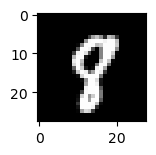

Index: 7216, Predicted: 6, Actual: 0


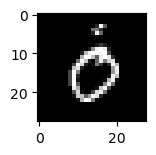

Index: 7293, Predicted: 9, Actual: 4


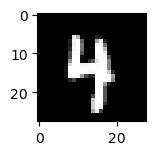

Index: 7391, Predicted: 9, Actual: 4


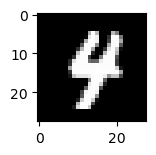

Index: 7432, Predicted: 1, Actual: 7


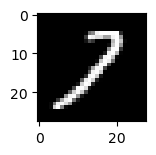

Index: 7492, Predicted: 7, Actual: 2


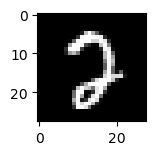

Index: 7524, Predicted: 0, Actual: 8


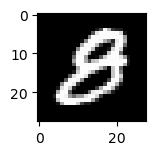

Index: 7574, Predicted: 1, Actual: 4


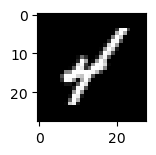

Index: 7637, Predicted: 0, Actual: 2


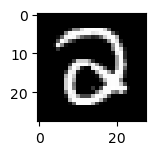

Index: 7797, Predicted: 6, Actual: 5


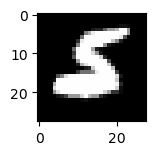

Index: 7821, Predicted: 2, Actual: 3


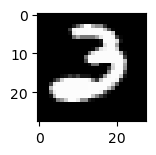

Index: 8081, Predicted: 6, Actual: 4


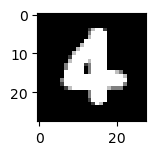

Index: 8094, Predicted: 8, Actual: 2


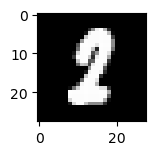

Index: 8095, Predicted: 1, Actual: 4


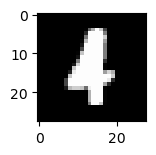

Index: 8107, Predicted: 9, Actual: 4


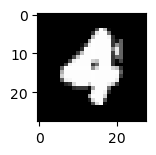

Index: 8246, Predicted: 5, Actual: 3


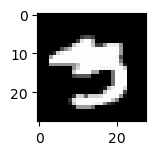

Index: 8277, Predicted: 5, Actual: 3


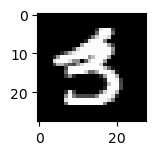

Index: 8279, Predicted: 4, Actual: 8


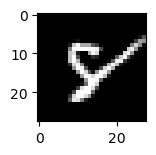

Index: 8318, Predicted: 0, Actual: 2


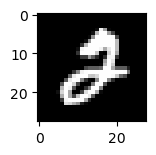

Index: 8325, Predicted: 6, Actual: 0


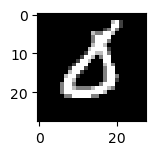

Index: 8408, Predicted: 5, Actual: 8


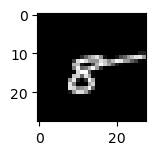

Index: 8410, Predicted: 6, Actual: 8


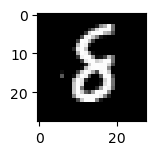

Index: 8416, Predicted: 1, Actual: 4


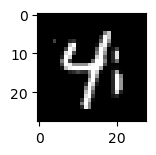

Index: 8520, Predicted: 9, Actual: 4


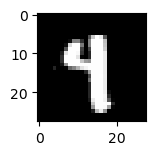

Index: 8527, Predicted: 9, Actual: 4


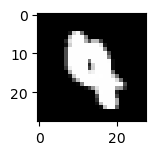

Index: 9009, Predicted: 2, Actual: 7


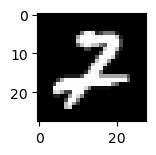

Index: 9015, Predicted: 2, Actual: 7


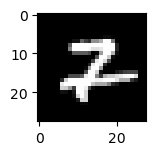

Index: 9024, Predicted: 2, Actual: 7


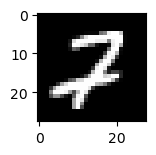

Index: 9280, Predicted: 5, Actual: 8


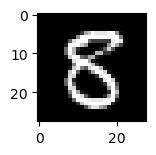

Index: 9624, Predicted: 8, Actual: 3


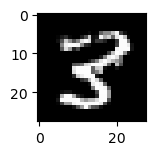

Index: 9634, Predicted: 1, Actual: 0


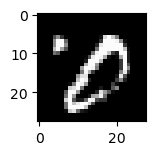

Index: 9642, Predicted: 7, Actual: 9


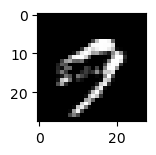

Index: 9655, Predicted: 5, Actual: 3


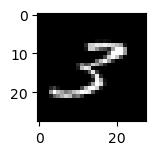

Index: 9664, Predicted: 7, Actual: 2


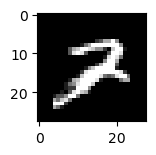

Index: 9716, Predicted: 0, Actual: 2


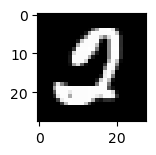

Index: 9719, Predicted: 0, Actual: 5


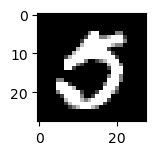

Index: 9726, Predicted: 0, Actual: 2


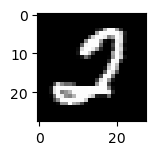

Index: 9729, Predicted: 6, Actual: 5


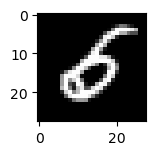

Index: 9741, Predicted: 7, Actual: 9


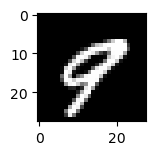

Index: 9744, Predicted: 1, Actual: 8


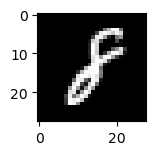

Index: 9745, Predicted: 1, Actual: 4


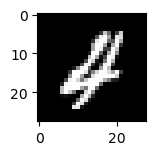

Index: 9749, Predicted: 6, Actual: 5


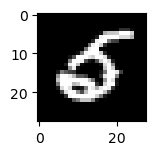

Index: 9751, Predicted: 0, Actual: 2


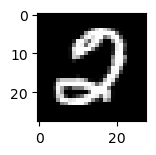

Index: 9768, Predicted: 0, Actual: 2


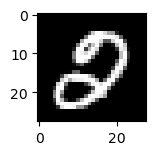

Index: 9770, Predicted: 0, Actual: 5


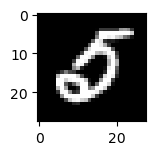

Index: 9779, Predicted: 0, Actual: 2


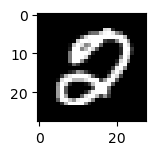

Index: 9792, Predicted: 1, Actual: 4


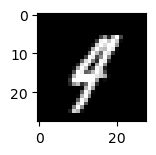

Index: 9811, Predicted: 8, Actual: 2


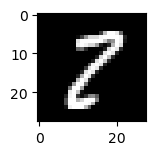

Index: 9831, Predicted: 1, Actual: 5


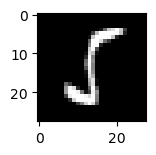

Index: 9839, Predicted: 7, Actual: 2


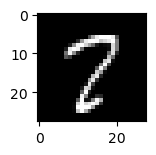

Index: 9847, Predicted: 7, Actual: 2


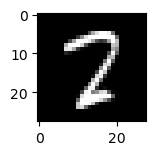

Index: 9867, Predicted: 8, Actual: 2


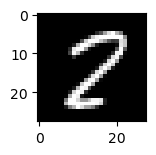

Index: 9883, Predicted: 6, Actual: 5


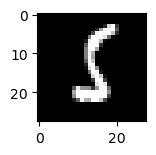

Index: 9888, Predicted: 0, Actual: 6


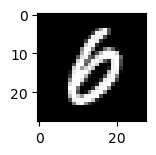

Index: 9893, Predicted: 8, Actual: 2


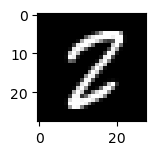

Index: 9904, Predicted: 0, Actual: 2


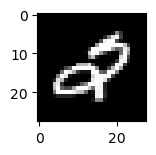

Index: 9905, Predicted: 9, Actual: 3


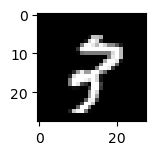

Index: 9944, Predicted: 8, Actual: 3


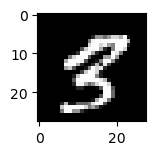

Index: 9982, Predicted: 6, Actual: 5


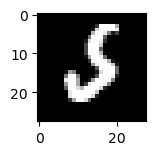

In [47]:
for i in misses.index:  
    print(f"Index: {i}, Predicted: {comparison['Predicted'].iloc[i]}, Actual: {comparison['Actual'].iloc[i]}")
    pyplot.subplot(330 + 1)
    pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()